# Compositional analysis of the ACM cardiac leucocytes 6mpi dataset (Pkp2+Ttn) - myeloids - using scCoda `pertpy`:
- **Developed by**: Christian Eger
- **Modified by**: Alexandra Cirnu
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 231214
- **Last modified**: 240509

#### Environment: scCoda

To install `pertpy` on MacOS create a new mamba environment and activte it. Then go int 'github' folder and type 'git clone https://github.com/theislab/pertpy.git'. Change directory to 'pertpy' and type 'pip install .' 

Look at website to solve problem at the end: https://www.sc-best-practices.org/conditions/compositional.html

In [39]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import numpy as np
            #import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import scanpy as sc
import pertpy as pt
from statannot import add_stat_annotation
from scipy import stats
import muon as mu
from muon import atac as ac
from muon import prot

In [40]:
sc.logging.print_versions()

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
PIL                         10.2.0
absl                        NA
adjustText                  1.0.4
altair                      4.2.2
arrow                       1.3.0
arviz                       0.17.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
blitzgsea                   NA
certifi                     2024.02.02
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.3.2
chex                        0.1.85
colorama                    0.4.6
comm                        0.2.1
contextlib2                 NA
custom_inherit              2.4.1
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0
debugpy                     1.8.1
decorator                   5.1.1
decoupler                   1.6.0
docrep                      0.3.2
entrypoints                 0.4
etils                       1.7.

Manual git installation of pertpy necessary due to Apple silicon
$ git clone https://github.com/theislab/pertpy.git
$ cd pertpy
$ pip install .

In [41]:
input = '/home/acirnu/github/ACM_Mouse_Immune/Workflow/5_Leiden_clustering+annotation_on_all_conditions/C_merge_lymphoids+myeloids/ACM_annotated_muon_ac240727.raw.h5mu'
mdata_data = mu.read_h5mu(input)
mdata_data 

MuData object with n_obs × n_vars = 44586 × 29477
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	44586 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
      obsp:	'connectivities', 'distances'
    prot:	44586 x 99
      obs:	'library', 'batch', 'lineage'
      var:	'gene_ids', 'feature_types'
      uns:	'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log_norm'

In [42]:
adata = mdata_data.mod["rna"]
adata = adata[adata.obs['model'].isin(["Pkp2"]) , :]
adata

View of AnnData object with n_obs × n_vars = 30280 × 29378
    obs: 'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo'
    obsm: 'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [43]:
adata.obs

,cell_source,donor,n_counts,sample,condition,genotype,infection,library,model,n_genes_by_counts,...,G2M_score,_scvi_batch,_scvi_labels,batch,leiden,classification,phenotype,annotation,lineage,general_celltype
AAACGCTGTTGTGTTG-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,478.0,Pkp2_Ctr_noninf_1,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,365.0,...,-0.083225,6,8,reference,3,MØ_Elmo1+,pro-inflammatory,MØ_Elmo1+,myeloid,Dock4+_MØ
AAACGCTTCTCGCTCA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,3581.0,Pkp2_Ctr_noninf_1,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,1599.0,...,-0.390143,6,8,reference,3,MØ_Elmo1+,pro-inflammatory,MØ_Elmo1+,myeloid,Dock4+_MØ
AAAGGTACAGAACATA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,16539.0,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,3854.0,...,-0.578955,7,6,reference,6,Mono_Cd14+Ly6c+,pro-inflammatory,Mono_Cd14+Ly6c+,myeloid,Monocyte
AAAGTCCAGGGACACT-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,13389.0,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,3788.0,...,-0.370084,7,10,reference,2,MØ_Mertk+Il10+,anti-inflammatory,MØ_Mertk+Il10+,myeloid,MØ_general
AAAGTCCCAGTAGGAC-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,12092.0,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,3493.0,...,-0.357287,7,10,reference,2,MØ_Mertk+Il10+,anti-inflammatory,MØ_Mertk+Il10+,myeloid,MØ_general
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCAGCGGGTTA-1-A4,AG_Gerull,Pkp2_Ctr_MCMV_5,4524.0,Pkp2_Ctr_MCMV_5,Pkp2_Ctr_MCMV,Pkp2_Ctr,MCMV,A4,Pkp2,1699.0,...,-0.064866,4,29,query,1,Tem/Trm-Cd8+,pro-inflammatory,Tem/Trm-Cd8+,lymphoid,Cd8_T_cell
TTTGATCTCTCGCCTA-1-A4,AG_Gerull,Pkp2_HetKO_MCMV_5,17569.0,Pkp2_HetKO_MCMV_5,Pkp2_HetKO_MCMV,Pkp2_HetKO,MCMV,A4,Pkp2,4270.0,...,-0.076327,14,27,query,9,cDC2,pro-inflammatory,cDC2,myeloid,DC
TTTGGAGAGATGCGAC-1-A4,AG_Gerull,Pkp2_HetKO_MCMV_5,569.0,Pkp2_HetKO_MCMV_5,Pkp2_HetKO_MCMV,Pkp2_HetKO,MCMV,A4,Pkp2,424.0,...,-0.146335,14,29,query,3,Th1_Cd4+,pro-inflammatory,Th1_Cd4+,lymphoid,Cd4_T_cell
TTTGGAGAGGACGCTA-1-A4,AG_Gerull,Pkp2_HetKO_MCMV_5,7031.0,Pkp2_HetKO_MCMV_5,Pkp2_HetKO_MCMV,Pkp2_HetKO,MCMV,A4,Pkp2,2463.0,...,-0.416546,14,21,query,7,Tem_Cd8+,pro-inflammatory,Tem_Cd8+,lymphoid,Cd8_T_cell


In [44]:
new_order_genotype = ['Pkp2_Ctr', 'Pkp2_HetKO']
adata.obs["genotype"] = adata.obs["genotype"].cat.reorder_categories(new_order_genotype, ordered=True)

adata.obs["genotype"].cat.categories

Index(['Pkp2_Ctr', 'Pkp2_HetKO'], dtype='object')

In [45]:
new_order_infection = ['noninf', 'MCMV']
adata.obs["infection"] = adata.obs["infection"].cat.reorder_categories(new_order_infection, ordered=True)

adata.obs["infection"].cat.categories

Index(['noninf', 'MCMV'], dtype='object')

In [46]:
new_order_condition = ['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV', 'Pkp2_HetKO_MCMV']
adata.obs["condition"] = adata.obs["condition"].cat.reorder_categories(new_order_condition, ordered=True)

adata.obs["condition"].cat.categories

Index(['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV',
       'Pkp2_HetKO_MCMV'],
      dtype='object')

create notebook for every compartment and compare across cell states
visualization improvement
reference to ctrl healthy

In [47]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="annotation",
    sample_identifier="sample",
    covariate_obs=["genotype", "infection", "condition"],
)
sccoda_data

MuData object with n_obs × n_vars = 30300 × 29407
  2 modalities
    rna:	30280 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
      obsp:	'connectivities', 'distances'
    coda:	20 x 29
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'

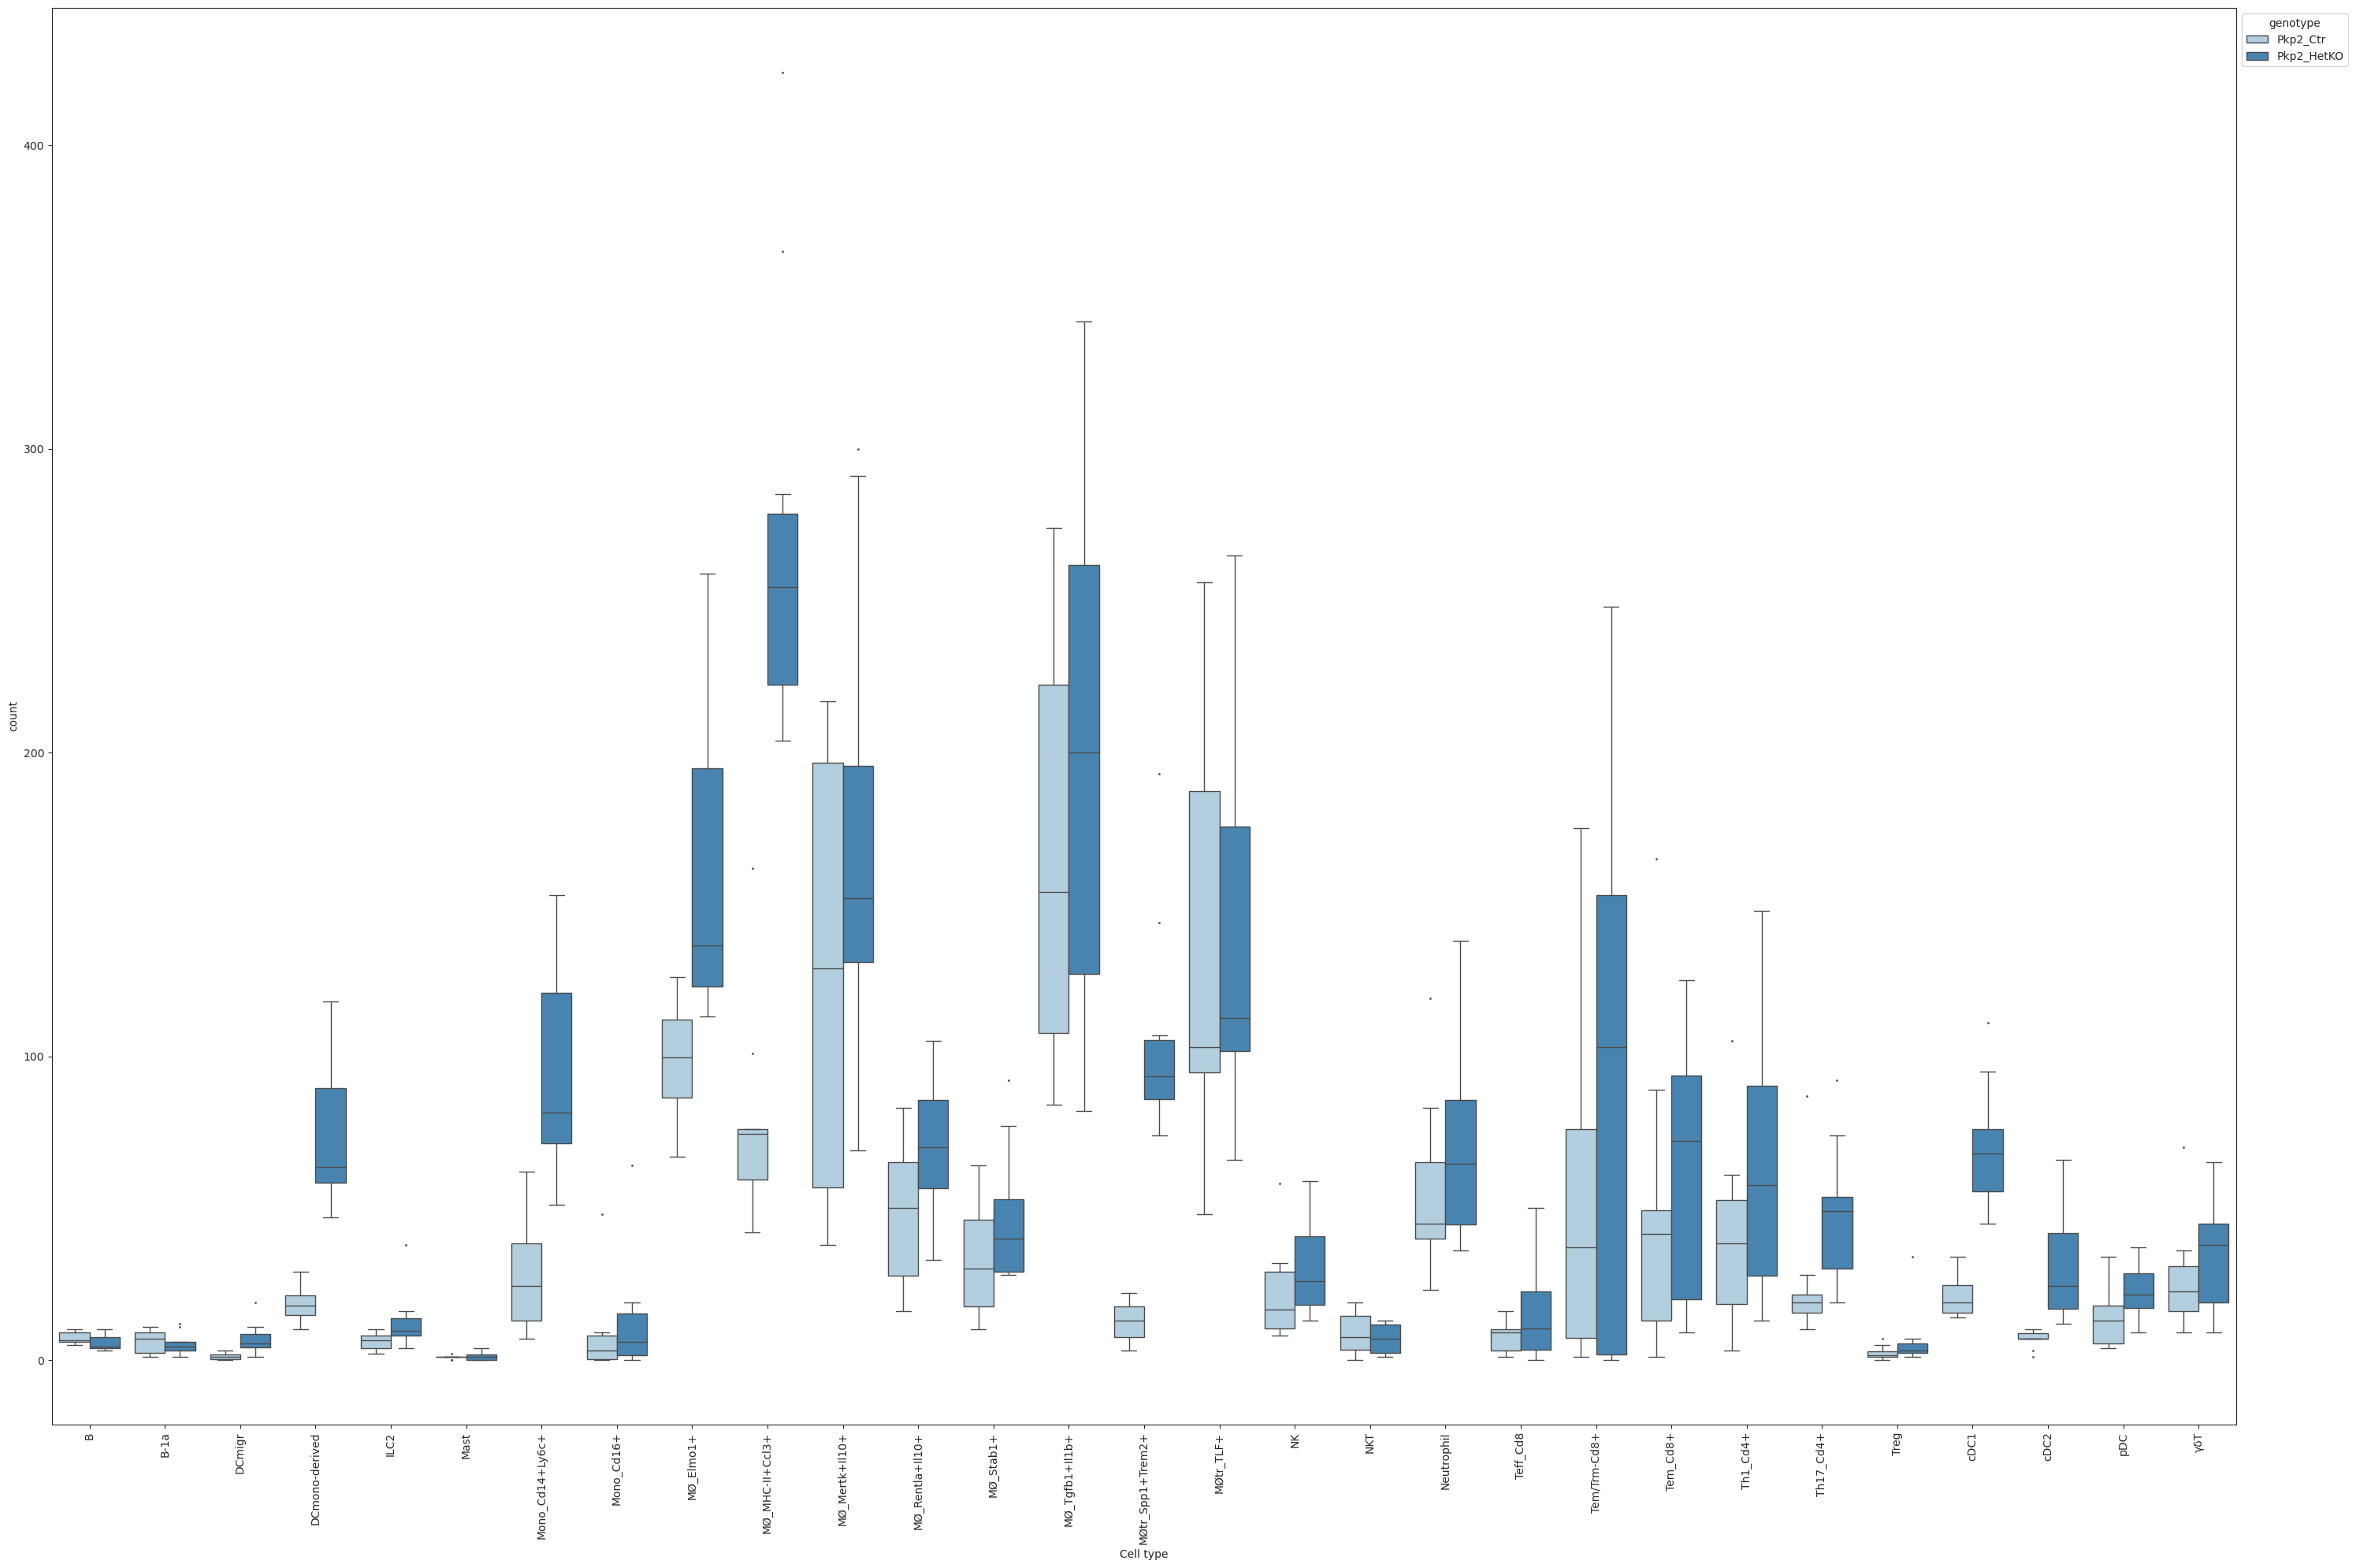

In [48]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="genotype",
    y_scale="count",
    figsize=(30, 20),
    add_dots=False,
    args_swarmplot={"palette": ["red"]},
)
plt.savefig("/home/acirnu/github/ACM_Mouse_Immune/Workflow/6_Calculate_statistically_relevant_changes/D_merge_lymphoids+myeloids_new_annotation/scCODA_genotype_Pkp2_combined_barplot.png", format='png')
plt.show()

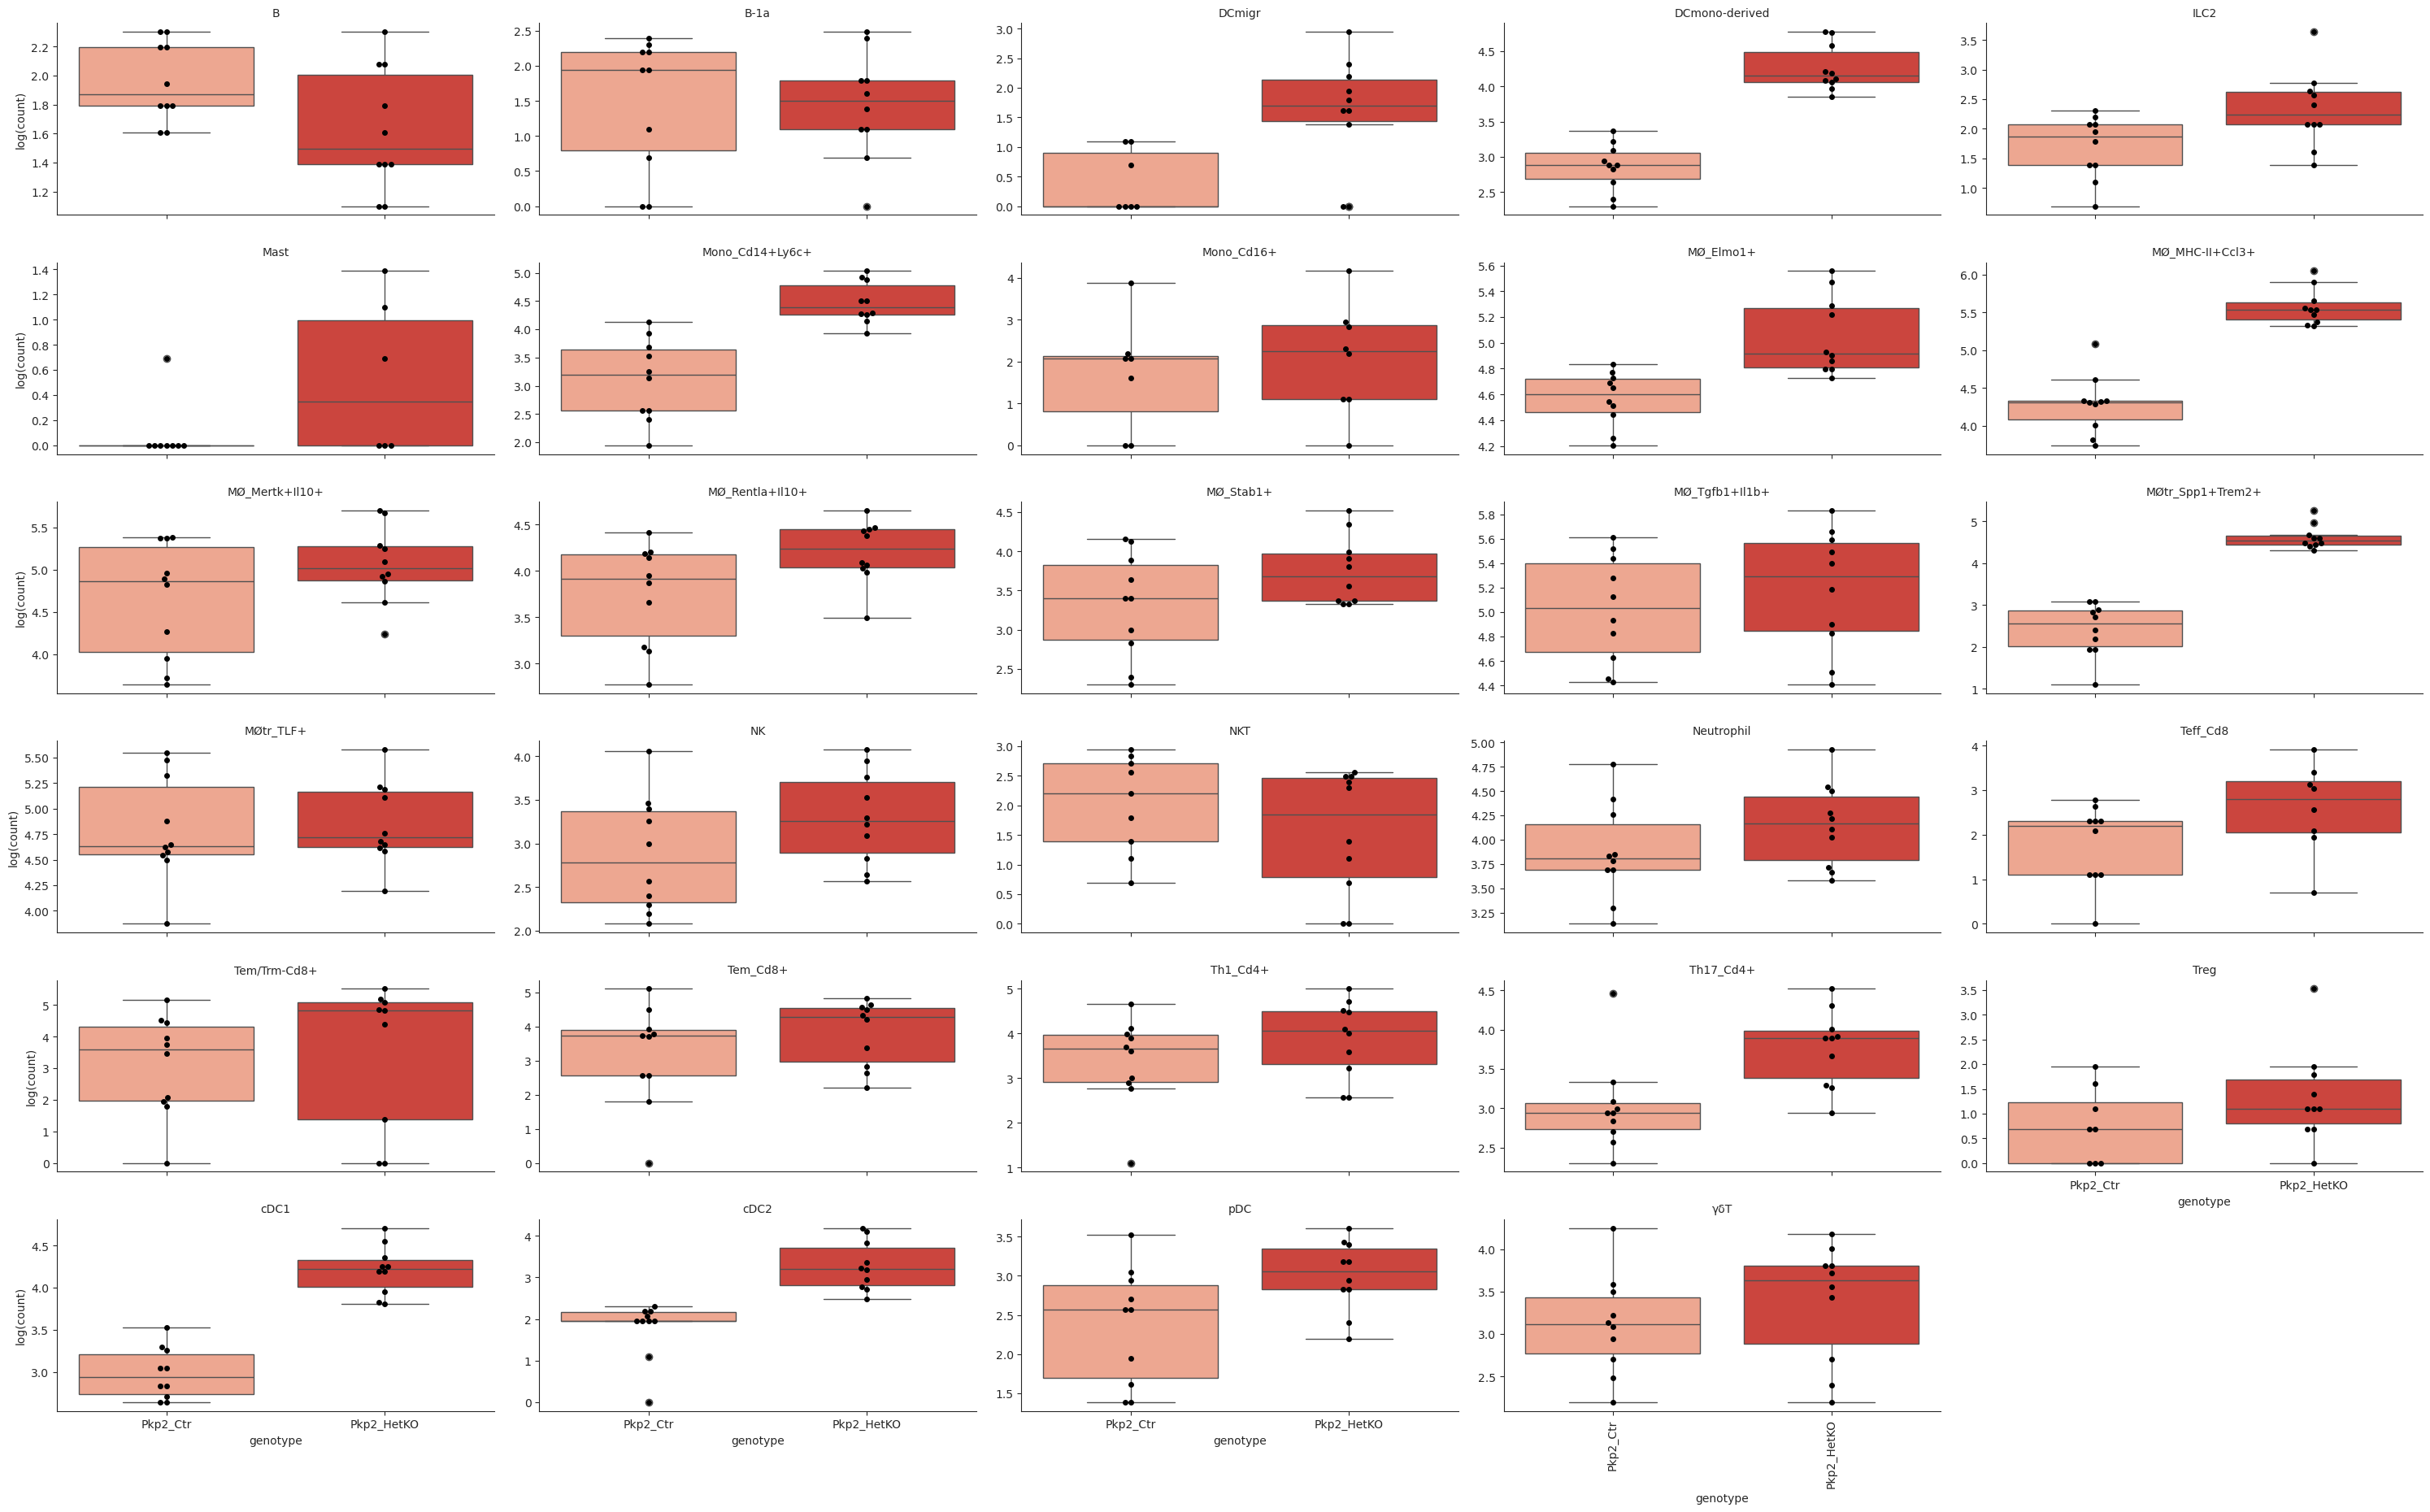

In [49]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="genotype",
    plot_facets=True,
    y_scale="log",
    add_dots=True,
    cmap="Reds",
)
plt.xticks(rotation=90)
plt.savefig("/home/acirnu/github/ACM_Mouse_Immune/Workflow/6_Calculate_statistically_relevant_changes/D_merge_lymphoids+myeloids_new_annotation/scCODA_genotype_Pkp2_single_barplots.png", format='png')
plt.show()

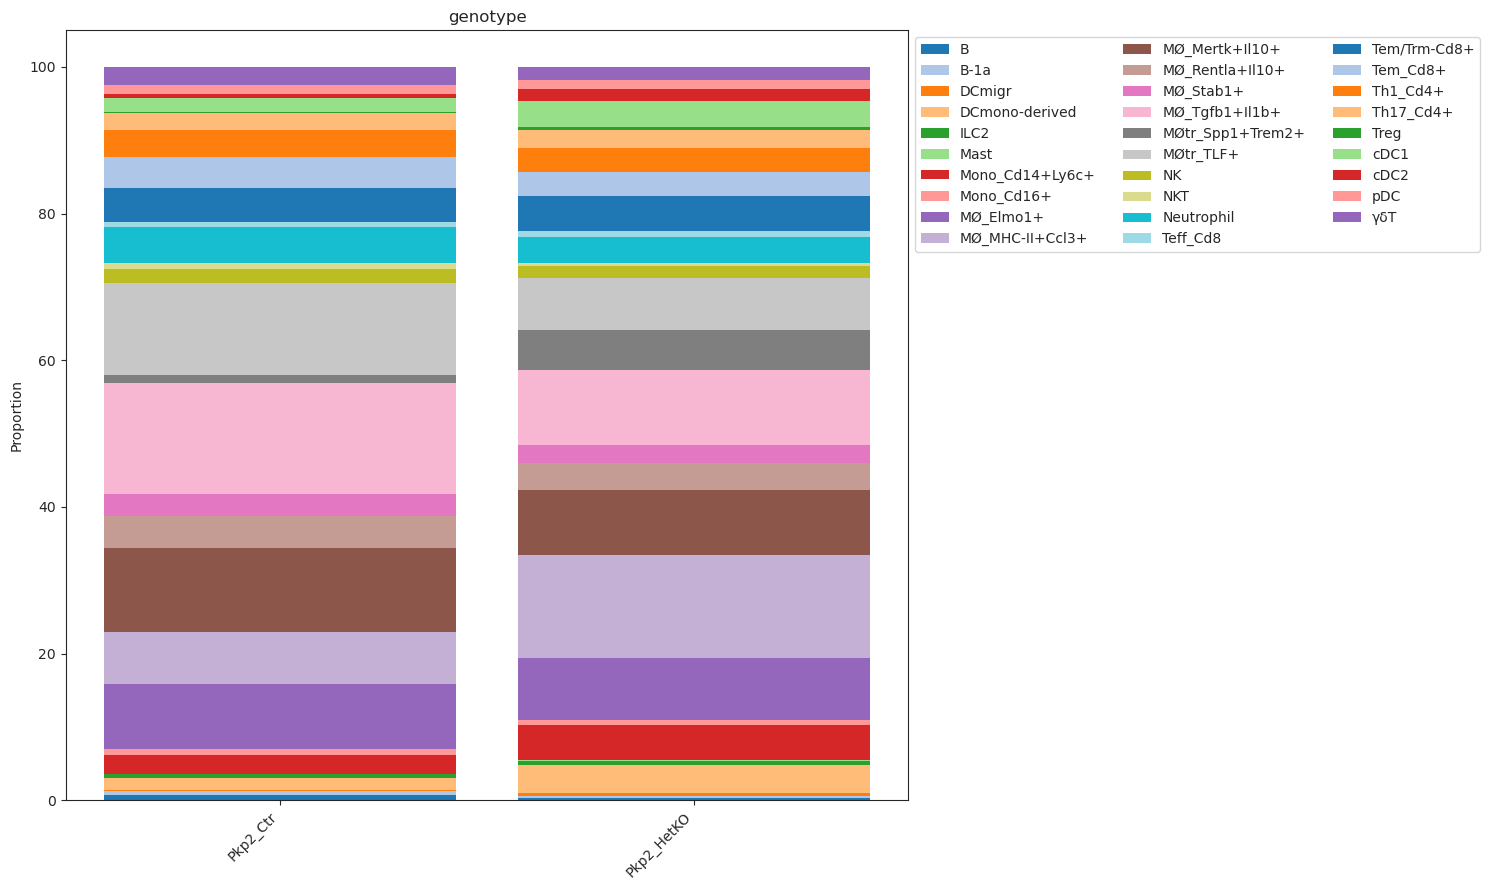

In [50]:
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="genotype", figsize=(15, 9) 
)
plt.legend(ncol=3, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [51]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="genotype",
    reference_cell_type="automatic",
)
sccoda_data["coda"]

Automatic reference selection! Reference cell type set to pDC

Zero counts encountered in data! Added a pseudocount of 0.5.

AnnData object with n_obs × n_vars = 20 × 29
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'

Run No-U-turn HMC sampling (nuts)

In [52]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=1234)

sample: 100%|██████████| 11000/11000 [03:08<00:00, 58.25it/s, 255 steps of size 1.23e-02. acc. prob=0.94]


In [53]:
sccoda_data["coda"]

AnnData object with n_obs × n_vars = 20 × 29
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_genotype[T.Pkp2_HetKO]'

#### Result interpreteation

**Intercepts**

The first column of the intercept summary shows the parameters determined by the MCMC inference.

The “Expected sample” column gives some context to the numerical values. If we had a new sample (with no active covariates) with a total number of cells equal to the mean sampling depth of the dataset, then this distribution over the cell types would be most likely.

**Effects**

For the effect summary, the first column again shows the inferred parameters for all combinations of covariates and cell types. Most important is the distinctions between zero and non-zero entries A value of zero means that no statistically credible effect was detected. For a value other than zero, a credible change was detected. A positive sign indicates an increase, a negative sign a decrease in abundance.

Since the numerical values of the “Final Parameter” column are not straightforward to interpret, the “Expected sample” and “log2-fold change” columns give us an idea on the magnitude of the change. The expected sample is calculated for each covariate separately (covariate value = 1, all other covariates = 0), with the same method as for the intercepts. The log-fold change is then calculated between this expected sample and the expected sample with no active covariates from the intercept section. Since the data is compositional, cell types for which no credible change was detected, can still change in abundance as well, as soon as a credible effect is detected on another cell type due to the sum-to-one constraint. If there are no credible effects for a covariate, its expected sample will be identical to the intercept sample, therefore the log2-fold change is 0.

In [54]:
sccoda_model.summary(sccoda_data, modality_key= "coda")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 20 samples, 29 cell types                                    │
│ Reference cell type                        │ pDC                                                                │
│ Formula                                    │ genotype                                                           │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                   Final Parameter  Expected Sample                                                              │
│ Cell Type                                                                                                       │
│ B                      0.060           13.205                                                                   │
│ B-1a                  -0.173           10.460                                                                   │
│ DCmigr                -0.620            6.690                                                                   │
│ DCmono-derived         0.965           32.641                                                                   │
│ ILC2                   0.101           13.757                                                                   │
│ Mast                  -0.915            4.981                                                                   │
│ Mono_Cd14+Ly6c+        1.190           40.878                                                                   │
│ Mono_Cd16+            -0.294            9.268                                                                   │
│ MØ_Elmo1+              2.477          148.055                                                                   │
│ MØ_MHC-II+Ccl3+        2.212          113.588                                                                   │
│ MØ_Mertk+Il10+         2.537          157.210                                                                   │
│ MØ_Rentla+Il10+        1.706           68.483                                                                   │
│ MØ_Stab1+              1.310           46.089                                                                   │
│ MØ_Tgfb1+Il1b+         2.873          219.990                                                                   │
│ MØtr_Spp1+Trem2+       0.707           25.219                                                                   │
│ MØtr_TLF+              2.661          177.964                                                                   │
│ NK                     0.923           31.299                                                                   │
│ NKT                   -0.016           12.238                                                                   │
│ Neutrophil             1.762           72.427                                                                   │
│ Teff_Cd8               0.075           13.404                                                                   │
│ Tem/Trm-Cd8+           1.185           40.674                                                                   │
│ Tem_Cd8+               1.333           47.162                                                                   │
│ Th1_Cd4+               1.414           51.141                                                                   │
│ Th17_Cd4+              1.134           38.651                                                                   │
│ Treg                  -0.541            7.240                                                                   │
│ cDC1                   1.069           36.219                                                                   │
│ cDC2                   0.256           16.064                                                                   │
│ pDC                    0.613           22.956                                                                   │
│ γδT                    1.078           36.546                                                                   │
└───────────────────────────────────────────────────────

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                        Final Parameter  Expected Sample  log2-fold change                       │
│ Covariate            Cell Type                                                                                  │
│ genotypeT.Pkp2_HetKO B                      0.000           11.233            -0.233                            │
│                      B-1a                   0.000            8.898            -0.233                            │
│                      DCmigr                 0.000            5.691            -0.233                            │
│                      DCmono-derived         0.753           58.967             0.853                            │
│                      ILC2                   0.000           11.703            -0.233                            │
│                      Mast                   0.000            4.237            -0.233                            │
│                      Mono_Cd14+Ly6c+        0.736           72.598             0.829                            │
│                      Mono_Cd16+             0.000            7.884            -0.233                            │
│                      MØ_Elmo1+              0.000          125.946            -0.233                            │
│                      MØ_MHC-II+Ccl3+        0.791          213.029             0.907                            │
│                      MØ_Mertk+Il10+         0.000          133.734            -0.233                            │
│                      MØ_Rentla+Il10+        0.000           58.256            -0.233                            │
│                      MØ_Stab1+              0.000           39.207            -0.233                            │
│                      MØ_Tgfb1+Il1b+         0.000          187.139            -0.233                            │
│                      MØtr_Spp1+Trem2+       1.338           81.760             1.697                            │
│                      MØtr_TLF+             -0.361          105.534            -0.754                            │
│                      NK                     0.000           26.625            -0.233                            │
│                      NKT                    0.000           10.411            -0.233                            │
│                      Neutrophil             0.000           61.612            -0.233                            │
│                      Teff_Cd8               0.000           11.403            -0.233                            │
│                      Tem/Trm-Cd8+           0.000           34.600            -0.233                            │
│                      Tem_Cd8+               0.000           40.119            -0.233                            │
│                      Th1_Cd4+               0.000           43.504            -0.233                            │
│                      Th17_Cd4+              0.000           32.880            -0.233                            │
│                      Treg                   0.000            6.159            -0.233                            │
│                      cDC1                   0.617           57.092             0.657                            │
│                      cDC2                   0.000           13.665            -0.233                            │
│                      pDC                    0.000           19.528            -0.233                            │
│                      γδT                    0.000           31.089            -0.233                            │
└───────────────────────────────────────────────────────

### Filter out credible effects

In [55]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate               Cell Type       
genotype[T.Pkp2_HetKO]  B                   False
                        B-1a                False
                        DCmigr              False
                        DCmono-derived       True
                        ILC2                False
                        Mast                False
                        Mono_Cd14+Ly6c+      True
                        Mono_Cd16+          False
                        MØ_Elmo1+           False
                        MØ_MHC-II+Ccl3+      True
                        MØ_Mertk+Il10+      False
                        MØ_Rentla+Il10+     False
                        MØ_Stab1+           False
                        MØ_Tgfb1+Il1b+      False
                        MØtr_Spp1+Trem2+     True
                        MØtr_TLF+            True
                        NK                  False
                        NKT                 False
                        Neutrophil          False
         

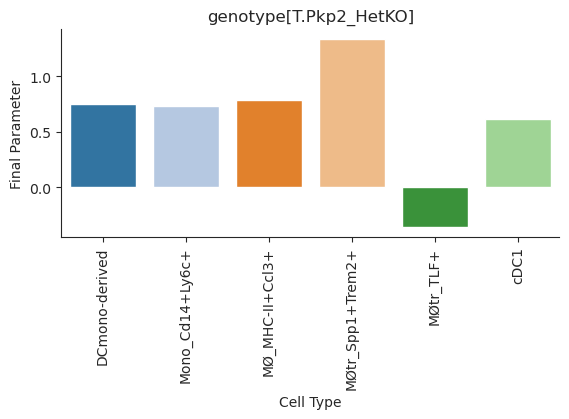

In [56]:
pt.pl.coda.effects_barplot(sccoda_data, modality_key="coda", parameter="Final Parameter")

##### Adjust the "false discovery rate"

In [57]:
sccoda_data

MuData object with n_obs × n_vars = 30300 × 29407
  2 modalities
    rna:	30280 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
      obsp:	'connectivities', 'distances'
    coda:	20 x 29
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.Pkp2_HetKO]'

In [58]:
sccoda_data["coda"].varm["effect_df_genotype[T.Pkp2_HetKO]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
B,0.000000,-0.917,0.235,0.284,0.5248,11.232931,-0.233331
B-1a,0.000000,-0.806,0.385,0.232,0.4276,8.898206,-0.233331
DCmigr,0.000000,-0.281,1.029,0.310,0.5298,5.690794,-0.233331
DCmono-derived,0.753129,0.299,1.185,0.243,0.9915,58.967037,0.853205
ILC2,0.000000,-0.478,0.648,0.190,0.3958,11.703053,-0.233331
Mast,0.000000,-0.739,0.590,0.229,0.4172,4.236976,-0.233331
Mono_Cd14+Ly6c+,0.736092,0.324,1.147,0.219,0.9978,72.598297,0.828625
Mono_Cd16+,0.000000,-0.597,0.661,0.211,0.4127,7.884113,-0.233331
MØ_Elmo1+,0.000000,-0.215,0.318,0.079,0.2799,125.945558,-0.233331


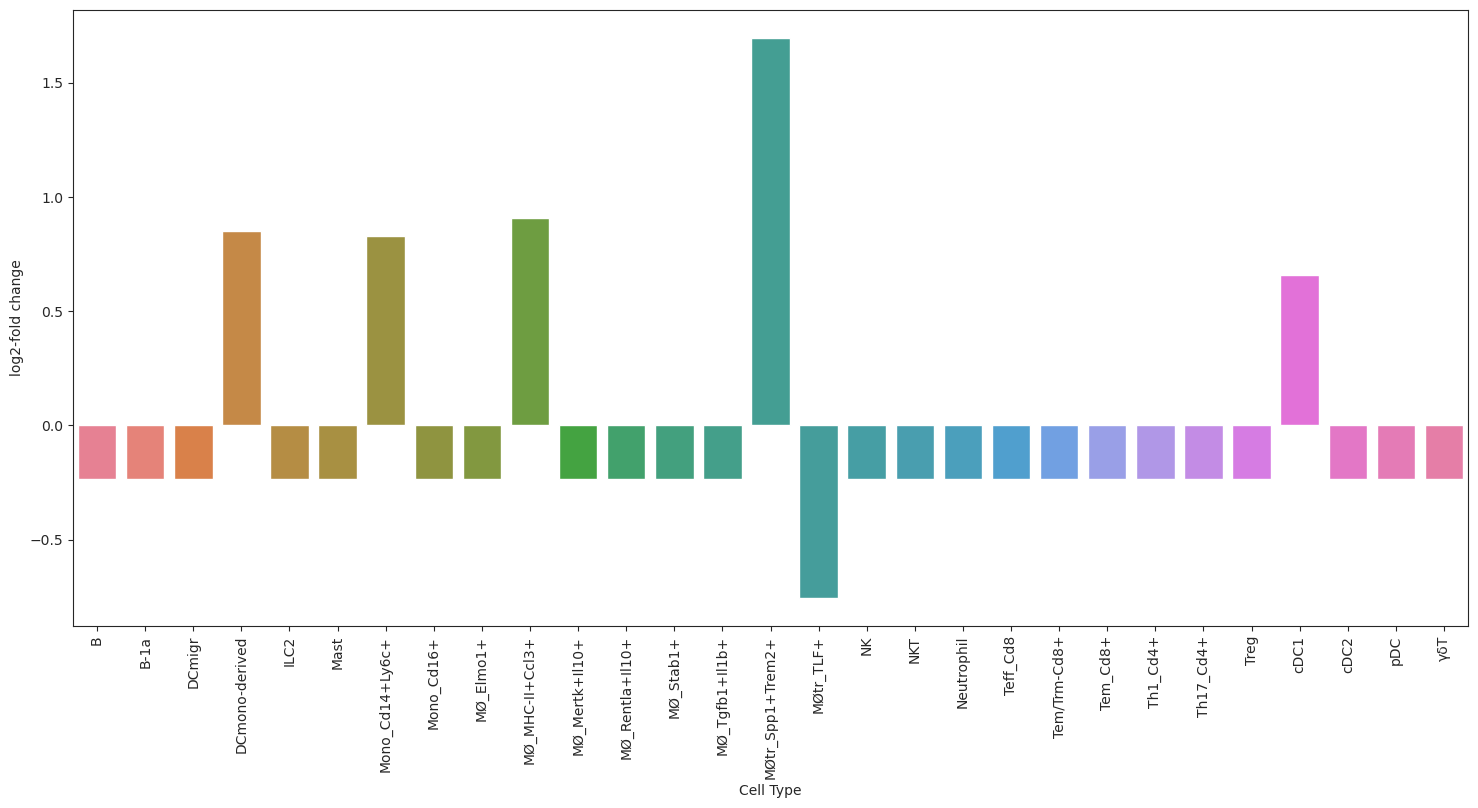

In [59]:
plt.figure(figsize=(18,8))
sns.barplot(data=sccoda_data["coda"].varm["effect_df_genotype[T.Pkp2_HetKO]"], x="Cell Type", y="log2-fold change", hue="Cell Type")
plt.xticks(rotation=90)
plt.savefig("/home/acirnu/github/ACM_Mouse_Immune/Workflow/6_Calculate_statistically_relevant_changes/D_merge_lymphoids+myeloids_new_annotation/scCODA_genotype_Pkp2.png", format='png')
plt.show()

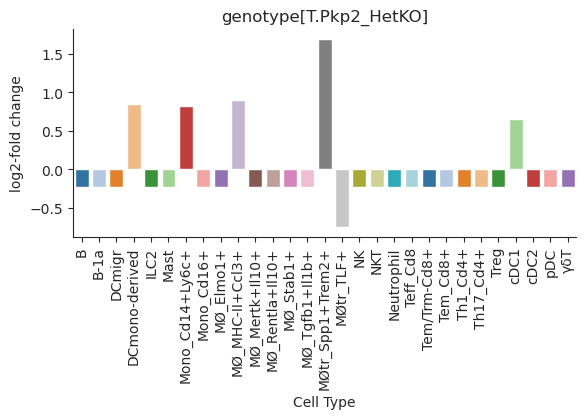

In [60]:
pt.pl.coda.effects_barplot(sccoda_data, "coda", "genotype")
plt.show()